# Explore DeepFashion-2 Dataset

Prepare dataset for YOLO training

In [1]:
import glob
import os
import json
from collections import Counter
from PIL import Image
import pandas as pd
import tensorflow as tf
from tqdm import tqdm

import shutil
import sys
# sys.path.insert(0, "/recsys_data/RecSys/fashion/automl/efficientnetv2")
# import effnetv2_model

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_dir = "/recsys_data/RecSys/fashion/DeepFashion2_Dataset/"
image_dir = os.path.join(data_dir, "train/image")
label_dir = os.path.join(data_dir, "train/annos")

In [3]:
def plot_example(exid="191961"):
    img_name = exid
    with open(os.path.join(label_dir, img_name+".json"), 'r') as fr:
        data = json.load(fr)
    img_path = os.path.join(image_dir, img_name+".jpg")

    im = Image.open(img_path)
    width, height = im.size
    fig, ax = plt.subplots()
    ax.imshow(im)
    yolo_data = []
    for dress in data:
        if dress not in ('source', 'pair_id'):
            bb = data[dress]['bounding_box']
            cid = data[dress]['category_id']
            cnm = data[dress]['category_name']
            w, h = bb[2]-bb[0], bb[3]-bb[1]
            centre_x, centre_y = (bb[0] + bb[2])/2./width, (bb[1] + bb[3])/2./height 
            rect = patches.Rectangle((bb[0], bb[1]), w, h, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            yolo_data.append([cid-1, centre_x, centre_y, w/width, h/height])

    plt.show()
    return yolo_data

def write_data(exid, out_path=None):
    img_name = exid
    with open(os.path.join(label_dir, img_name+".json"), 'r') as fr:
        data = json.load(fr)
    img_path = os.path.join(image_dir, img_name+".jpg")

    im = Image.open(img_path)
    width, height = im.size
    yolo_data = []
    for dress in data:
        if dress not in ('source', 'pair_id'):
            bb = data[dress]['bounding_box']
            cid = data[dress]['category_id']
            w, h = bb[2]-bb[0], bb[3]-bb[1]
            centre_x, centre_y = (bb[0] + bb[2])/2./width, (bb[1] + bb[3])/2./height 
            yolo_data.append([cid-1, centre_x, centre_y, w/width, h/height])
    
    if out_path:
        with open(out_path, "w") as fw:
            for dd in yolo_data:
                fw.write(" ".join([str(d) for d in dd])+"\n")
    return yolo_data
    

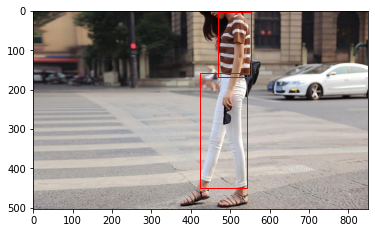

[[0,
  0.6011764705882353,
  0.17196819085487078,
  0.0988235294117647,
  0.32803180914512925],
 [7, 0.5688235294117647, 0.6043737574552683, 0.14, 0.5805168986083499]]

In [4]:
plot_example()

In [5]:
write_data("191961")

[[0,
  0.6011764705882353,
  0.17196819085487078,
  0.0988235294117647,
  0.32803180914512925],
 [7, 0.5688235294117647, 0.6043737574552683, 0.14, 0.5805168986083499]]

In [6]:
src_train_dir = os.path.join(data_dir, "train")
src_valid_dir = os.path.join(data_dir, "validation")
tgt_dir = "/recsys_data/RecSys/PyTorch-YOLOv3/data/custom"

In [8]:
src_train_images = glob.glob(os.path.join(src_train_dir, "image/*.jpg"))
with open(os.path.join(tgt_dir, "train.txt"), "w") as fw_train:
    for img_path in tqdm(src_train_images):
        img_id = img_path.split("/")[-1].split(".")[0]
        tgt_data_path = os.path.join(tgt_dir, f"labels/{img_id}.txt")
        tgt_img_path = os.path.join(tgt_dir, f"images/{img_id}.jpg")
        write_data(img_id, tgt_data_path)
        shutil.copyfile(img_path, tgt_img_path)
        
        partial_image_path = "/".join(tgt_img_path.split("/")[-4:])
        fw_train.write(partial_image_path+"\n")


100%|██████████| 191961/191961 [06:06<00:00, 523.50it/s]


In [9]:
src_valid_images = glob.glob(os.path.join(src_valid_dir, "image/*.jpg"))
with open(os.path.join(tgt_dir, "valid.txt"), "w") as fw_valid:
    for img_path in tqdm(src_valid_images):
        img_id = img_path.split("/")[-1].split(".")[0]
        tgt_data_path = os.path.join(tgt_dir, f"labels/{img_id}.txt")
        tgt_img_path = os.path.join(tgt_dir, f"images/{img_id}.jpg")
        write_data(img_id, tgt_data_path)
        shutil.copyfile(img_path, tgt_img_path)
        
        partial_image_path = "/".join(tgt_img_path.split("/")[-4:])
        fw_valid.write(partial_image_path+"\n")


100%|██████████| 32153/32153 [02:01<00:00, 264.35it/s]


In [11]:
tgt_img_path, tgt_data_path

('/recsys_data/RecSys/PyTorch-YOLOv3/data/custom/images/025818.jpg',
 '/recsys_data/RecSys/PyTorch-YOLOv3/data/custom/labels/025818.txt')